In [1]:
#importing important libraries for performing EDA
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy.stats import zscore,boxcox
from sklearn.preprocessing import LabelEncoder
import warnings
warnings.filterwarnings('ignore')

In [2]:
ln=pd.read_csv('Loan.csv')
ln

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [3]:
ln.shape

(614, 13)

In [4]:
len(ln)

614

In [5]:
ln.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
ln.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [7]:
#dropping loan id column
ln.drop(['Loan_ID'],axis=1,inplace=True)

In [8]:
#Displaying columns with null values
for i in ln.columns:
    dtp=ln[i].dtypes
    nl=ln[i].isnull().sum()
    if nl>0:
        print('Number of null values in, ', i,' =' ,nl, ' & datatypes ===',dtp)

Number of null values in,  Gender  = 13  & datatypes === object
Number of null values in,  Married  = 3  & datatypes === object
Number of null values in,  Dependents  = 15  & datatypes === object
Number of null values in,  Self_Employed  = 32  & datatypes === object
Number of null values in,  LoanAmount  = 22  & datatypes === float64
Number of null values in,  Loan_Amount_Term  = 14  & datatypes === float64
Number of null values in,  Credit_History  = 50  & datatypes === float64


In [9]:
#replacing all null values present in the categorical attributes by their mode value
ln['Gender'].replace(np.NaN,ln['Gender'].mode().values[0],inplace=True)
ln['Married'].replace(np.NaN,ln['Married'].mode().values[0],inplace=True)
ln['Dependents'].replace(np.NaN,ln['Dependents'].mode().values[0],inplace=True)
ln['Self_Employed'].replace(np.NaN,ln['Self_Employed'].mode().values[0],inplace=True)

In [10]:
#Checking NaN in LoanAmount when LoanStatus=Y/N and replacing them with mean of LoanAmount at status=Y/N
ln.loc[ln["Loan_Status"]=="Y",["LoanAmount"]]=ln.loc[ln["Loan_Status"]=="Y",["LoanAmount"]].fillna(ln.loc[ln["Loan_Status"]=="Y",["LoanAmount"]].mean())

ln.loc[ln["Loan_Status"]=="N",["LoanAmount"]]=ln.loc[ln["Loan_Status"]=="N",["LoanAmount"]].fillna(ln.loc[ln["Loan_Status"]=="N",["LoanAmount"]].mean())

In [11]:
#Checking NaN in LoanAmountTerm when LoanStatus=Y/N and replacing them with mode of LoanAmountTerm at status=Y/N at

ln.loc[ln["Loan_Status"]=="Y",["Loan_Amount_Term"]]=ln.loc[ln["Loan_Status"]=="Y",["Loan_Amount_Term"]].fillna(ln.loc[ln["Loan_Status"]=="Y",["Loan_Amount_Term"]].mode().iloc[0])

ln.loc[ln["Loan_Status"]=="N",["Loan_Amount_Term"]]=ln.loc[ln["Loan_Status"]=="N",["Loan_Amount_Term"]].fillna(ln.loc[ln["Loan_Status"]=="N",["Loan_Amount_Term"]].mode().iloc[0])


In [12]:
#Checking NaN in LoanAmountTerm when LoanStatus=Y/N and replacing them with mode of LoanAmountTerm at status=Y/N at

ln.loc[ln["Loan_Status"]=="Y",["Credit_History"]]=ln.loc[ln["Loan_Status"]=="Y",["Credit_History"]].fillna(ln.loc[ln["Loan_Status"]=="Y",["Credit_History"]].mode().iloc[0])

ln.loc[ln["Loan_Status"]=="N",["Credit_History"]]=ln.loc[ln["Loan_Status"]=="N",["Credit_History"]].fillna(ln.loc[ln["Loan_Status"]=="N",["Credit_History"]].mode().iloc[0])


In [13]:
#checking presence of null values in object type attributes
for i in ln.columns:
    if ln[i].isnull().sum()>0:
        print('There are null values')
else:
    print('There is no more null values')

There is no more null values


In [14]:
ln.min()

Gender                 Female
Married                    No
Dependents                  0
Education            Graduate
Self_Employed              No
ApplicantIncome           150
CoapplicantIncome           0
LoanAmount                  9
Loan_Amount_Term           12
Credit_History              0
Property_Area           Rural
Loan_Status                 N
dtype: object

In [15]:
ln.max()

Gender                       Male
Married                       Yes
Dependents                     3+
Education            Not Graduate
Self_Employed                 Yes
ApplicantIncome             81000
CoapplicantIncome           41667
LoanAmount                    700
Loan_Amount_Term              480
Credit_History                  1
Property_Area               Urban
Loan_Status                     Y
dtype: object

In [16]:
ln.mean()

ApplicantIncome      5403.459283
CoapplicantIncome    1621.245798
LoanAmount            146.460374
Loan_Amount_Term      342.410423
Credit_History          0.855049
dtype: float64

In [17]:
ln.median()

ApplicantIncome      3812.5
CoapplicantIncome    1188.5
LoanAmount            129.0
Loan_Amount_Term      360.0
Credit_History          1.0
dtype: float64

In [18]:
ln.std()

ApplicantIncome      6109.041673
CoapplicantIncome    2926.248369
LoanAmount             84.040402
Loan_Amount_Term       64.428629
Credit_History          0.352339
dtype: float64

In [19]:
print('CROSSTABULATION WRT LOAN_STATUS')
for i in ln.columns:
    if ln[i].dtypes==object:
        ctab=pd.crosstab(ln[i],ln['Loan_Status'])
        print("++"*30,'\n',ctab,'\n')        

CROSSTABULATION WRT LOAN_STATUS
++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ 
 Loan_Status    N    Y
Gender               
Female        37   75
Male         155  347 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ 
 Loan_Status    N    Y
Married              
No            79  134
Yes          113  288 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ 
 Loan_Status    N    Y
Dependents           
0            113  247
1             36   66
2             25   76
3+            18   33 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ 
 Loan_Status     N    Y
Education             
Graduate      140  340
Not Graduate   52   82 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ 
 Loan_Status      N    Y
Self_Employed          
No             166  366
Yes             26   56 

++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++ 
 Loan_Status     N    Y
Property_Area         
Rural          69  110
Semiurban      

In [20]:
ln.groupby(ln['Loan_Status']).mean()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
Loan_Status,,,,,
N,5446.078125,1877.807292,151.220994,344.56250,0.572917
Y,5384.068720,1504.516398,144.294404,341.43128,0.983412


In [21]:
ln.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.460374,342.410423,0.855049
std,6109.041673,2926.248369,84.040402,64.428629,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


In [22]:
o=['object']
ln.describe(include=o)

,Gender,Married,Dependents,Education,Self_Employed,Property_Area,Loan_Status
count,614,614,614,614,614,614,614
unique,2,2,4,2,2,3,2
top,Male,Yes,0,Graduate,No,Semiurban,Y
freq,502,401,360,480,532,233,422


   USING VISUAL METHODS FOR INDEPTH EXPLORATION

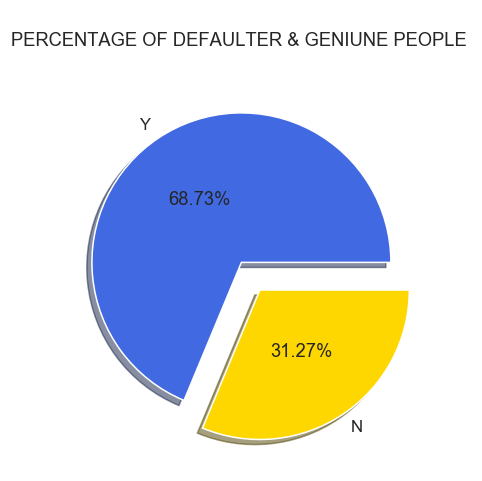

In [23]:
lbl=ln['Loan_Status'].value_counts().index.tolist()
per=ln['Loan_Status'].value_counts().values.tolist()
exp=(0,0.2)
clr=('royalblue','gold')
plt.figure(figsize=(19,5),dpi=110)
sns.set_context('talk',font_scale=0.9)
sns.set(style='whitegrid')
plt.title('\nPERCENTAGE OF DEFAULTER & GENIUNE PEOPLE ')
plt.pie(x=per,explode=exp,labels=lbl,colors=clr,autopct='%2.2f%%',pctdistance=0.5, shadow=True,radius=0.9)
plt.show()

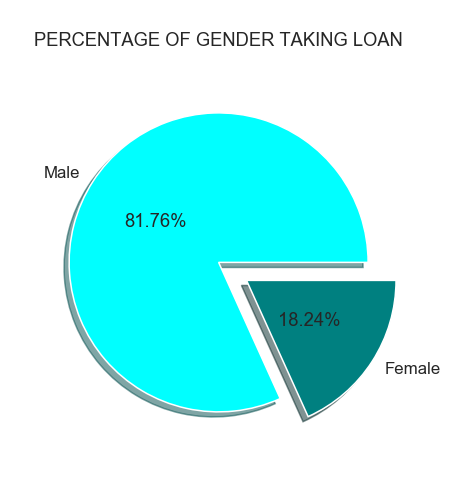

In [24]:
lbl=ln['Gender'].value_counts().index.tolist()
per=ln['Gender'].value_counts().values.tolist()
exp=(0,0.2)
clr=('cyan','teal')
plt.figure(figsize=(19,5),dpi=110)
sns.set_context('talk',font_scale=0.9)
sns.set(style='whitegrid')
plt.pie(x=per,explode=exp,labels=lbl,colors=clr,autopct='%2.2f%%',pctdistance=0.5, shadow=True,radius=0.9)
plt.title('\nPERCENTAGE OF GENDER TAKING LOAN')
plt.show()

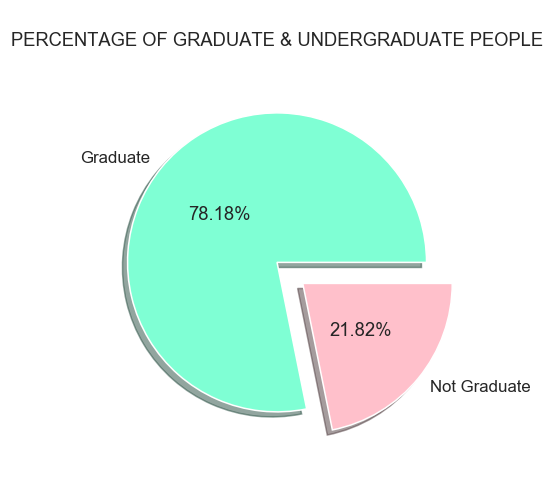

In [25]:
lbl=ln['Education'].value_counts().index.tolist()
per=ln['Education'].value_counts().values.tolist()
exp=(0,0.2)
clr=('aquamarine','pink')
plt.figure(figsize=(19,5),dpi=110)
sns.set_context('talk',font_scale=0.9)
sns.set(style='whitegrid')
plt.pie(x=per,explode=exp,labels=lbl,colors=clr,autopct='%2.2f%%',pctdistance=0.5, shadow=True,radius=0.9)
plt.title('\nPERCENTAGE OF GRADUATE & UNDERGRADUATE PEOPLE')
plt.show()

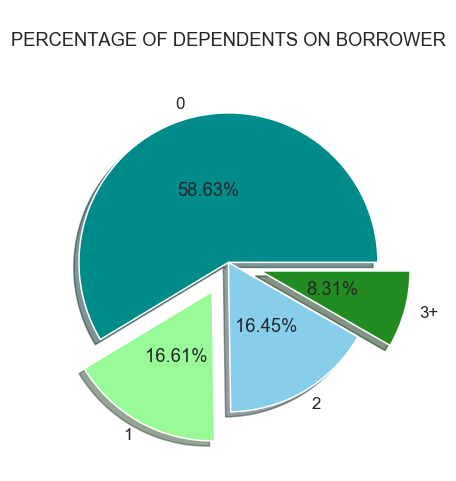

In [26]:
lbl=ln['Dependents'].value_counts().index.tolist()
per=ln['Dependents'].value_counts().values.tolist()
exp=(0,0.2,0,0.2)
clr=('darkcyan','palegreen','skyblue','forestgreen')
plt.figure(figsize=(19,5),dpi=110)
sns.set_context('talk',font_scale=0.9)
sns.set(style='whitegrid')
plt.pie(x=per,explode=exp,labels=lbl,colors=clr,autopct='%2.2f%%',pctdistance=0.5, shadow=True,radius=0.9)
plt.title('\nPERCENTAGE OF DEPENDENTS ON BORROWER')
plt.show()

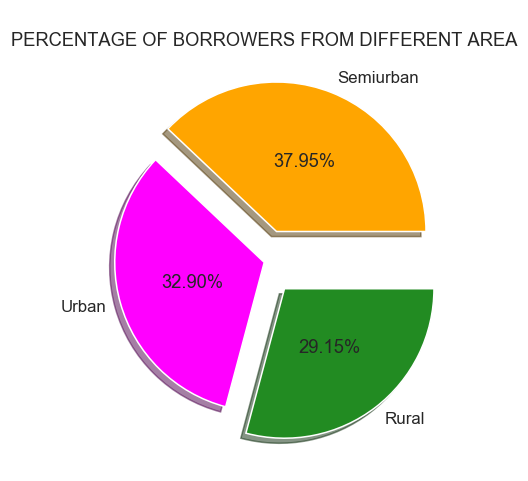

In [27]:
lbl=ln['Property_Area'].value_counts().index.tolist()
per=ln['Property_Area'].value_counts().values.tolist()
exp=(0.2,0,0.2)
clr=('orange','magenta','forestgreen')
plt.figure(figsize=(19,5),dpi=110)
sns.set_context('talk',font_scale=0.9)
sns.set(style='whitegrid')
plt.pie(x=per,explode=exp,labels=lbl,colors=clr,autopct='%2.2f%%',pctdistance=0.5, shadow=True,radius=0.9)
plt.title('\nPERCENTAGE OF BORROWERS FROM DIFFERENT AREA')
plt.show()

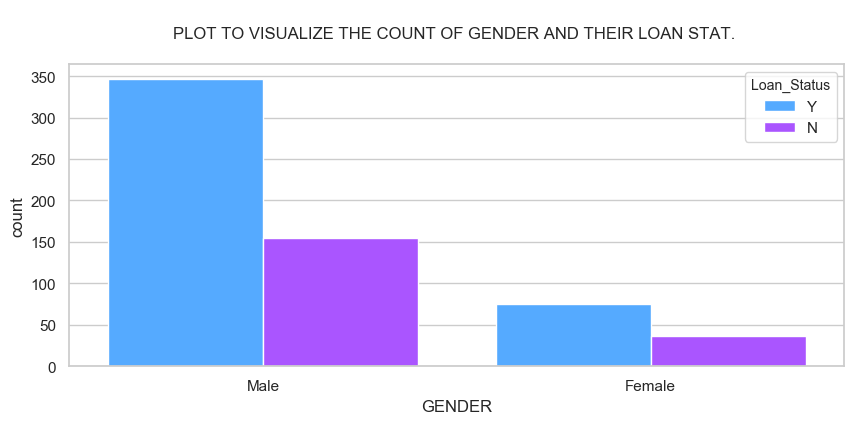

In [28]:
plt.figure(figsize=(10,4),dpi=100)
sns.set_context('talk',font_scale=0.9)
sns.set(style='whitegrid')
sns.countplot(x='Gender',hue='Loan_Status',data=ln,orient='v',palette='cool',saturation=25)
plt.xlabel('GENDER')
plt.title('\nPLOT TO VISUALIZE THE COUNT OF GENDER AND THEIR LOAN STAT. \n')
plt.show()

                        THE COUNT OF LOAN GIVEN TO MALE IS HIGH AS COMPARED TO THAT OF FEMALE

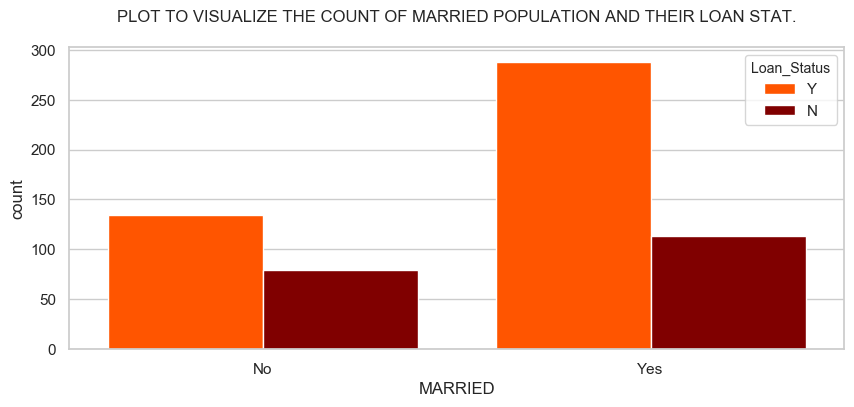

In [29]:
plt.figure(figsize=(10,4),dpi=100)
sns.set_context('talk',font_scale=0.9)
sns.set(style='whitegrid')
sns.countplot(x='Married',hue='Loan_Status',data=ln,orient='v',palette='gist_heat_r',saturation=25)
plt.xlabel('MARRIED')
plt.title('PLOT TO VISUALIZE THE COUNT OF MARRIED POPULATION AND THEIR LOAN STAT.\n')
plt.show()

                                THE COUNT OF LOAN GIVEN TO MARRIED PEOPLE IS HIGH 

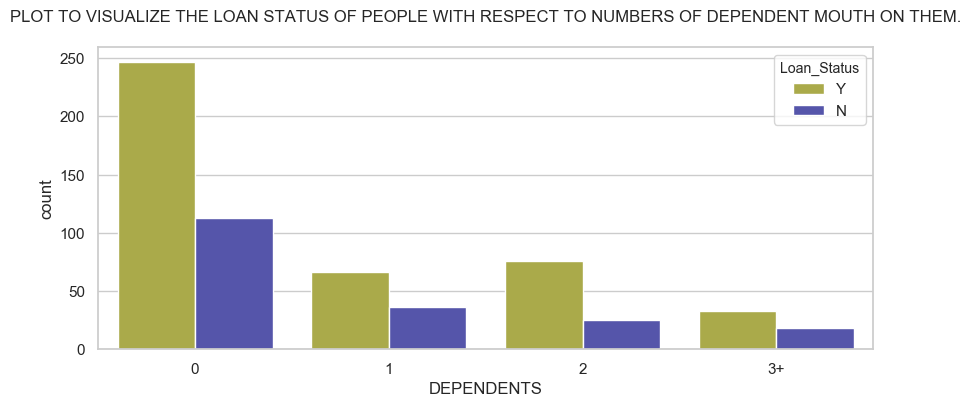

In [30]:
plt.figure(figsize=(10,4),dpi=100)
sns.set_context('talk',font_scale=0.9)
sns.set(style='whitegrid')
sns.countplot(x='Dependents',hue='Loan_Status',data=ln,orient='v',palette='gist_stern_r',saturation=25)
plt.xlabel('DEPENDENTS')
plt.title('PLOT TO VISUALIZE THE LOAN STATUS OF PEOPLE WITH RESPECT TO NUMBERS OF DEPENDENT MOUTH ON THEM.\n')
plt.show()

                       PEOPLE WITH ZERO VALUE OF DEPENDENTS ARE HIGH ON THE SIDE OF LOAN ALLOCATION

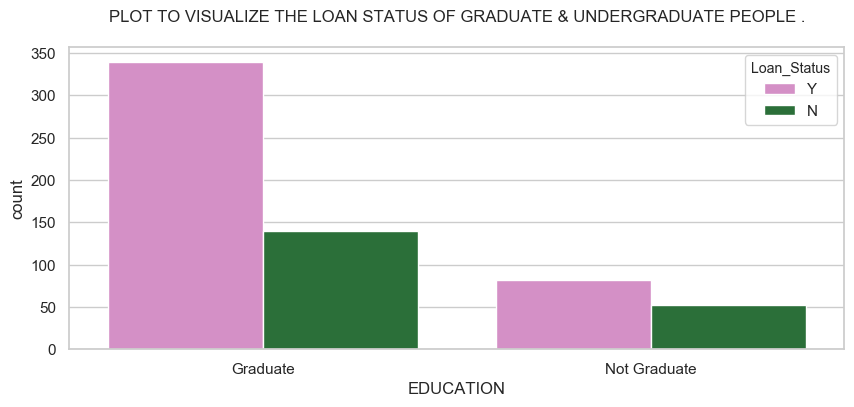

In [31]:
plt.figure(figsize=(10,4),dpi=100)
sns.set_context('talk',font_scale=0.9)
sns.set(style='whitegrid')
sns.countplot(x='Education',hue='Loan_Status',data=ln,orient='v',palette='cubehelix_r',saturation=25)
plt.xlabel('EDUCATION')
plt.title('PLOT TO VISUALIZE THE LOAN STATUS OF GRADUATE & UNDERGRADUATE PEOPLE .\n')
plt.show()

                              ALLOACTION OF LOAN TO GRADUATE PEOPLE HIGH  

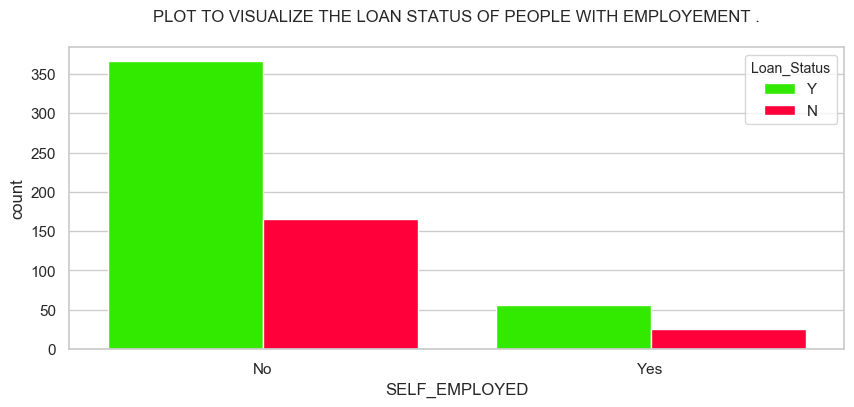

In [32]:
plt.figure(figsize=(10,4),dpi=100)
sns.set_context('talk',font_scale=0.9)
sns.set(style='whitegrid')
sns.countplot(x='Self_Employed',hue='Loan_Status',data=ln,orient='v',palette='prism',saturation=25)
plt.xlabel('SELF_EMPLOYED')
plt.title('PLOT TO VISUALIZE THE LOAN STATUS OF PEOPLE WITH EMPLOYEMENT .\n')
plt.show()

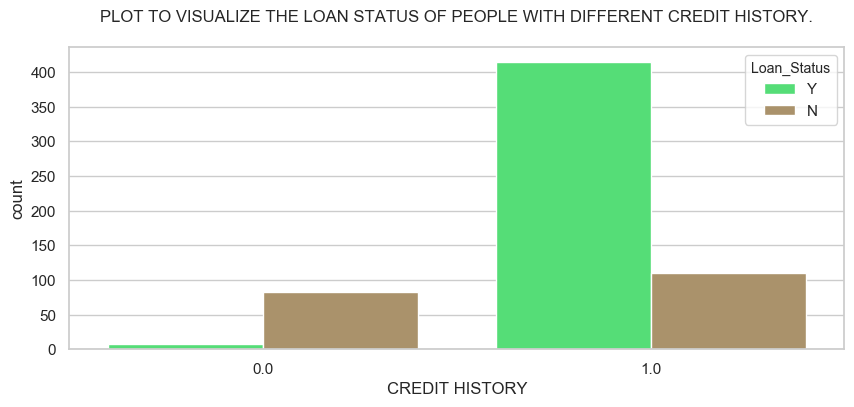

In [33]:
plt.figure(figsize=(10,4),dpi=100)
sns.set_context('talk',font_scale=0.9)
sns.set(style='whitegrid')
sns.countplot(x='Credit_History',hue='Loan_Status',data=ln,orient='v',palette='terrain',saturation=25)
plt.xlabel('CREDIT HISTORY')
plt.title('PLOT TO VISUALIZE THE LOAN STATUS OF PEOPLE WITH DIFFERENT CREDIT HISTORY.\n')
plt.show()

                               LOAN GIVEN TO PEOPLE WITH WITH CREDIT SCORE 1.0 IS HIGH

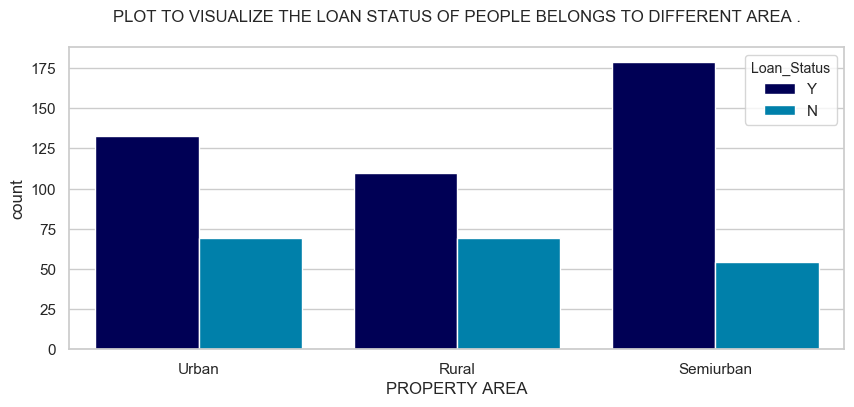

In [34]:
plt.figure(figsize=(10,4),dpi=100)
sns.set_context('talk',font_scale=0.9)
sns.set(style='whitegrid')
sns.countplot(x='Property_Area',hue='Loan_Status',data=ln,orient='v',palette='ocean',saturation=25)
plt.xlabel('PROPERTY AREA')
plt.title('PLOT TO VISUALIZE THE LOAN STATUS OF PEOPLE BELONGS TO DIFFERENT AREA .\n')
plt.show()

                        THE LOAN ALLOACTION CASE IS HIGH AT SEMI URBAN AREAS

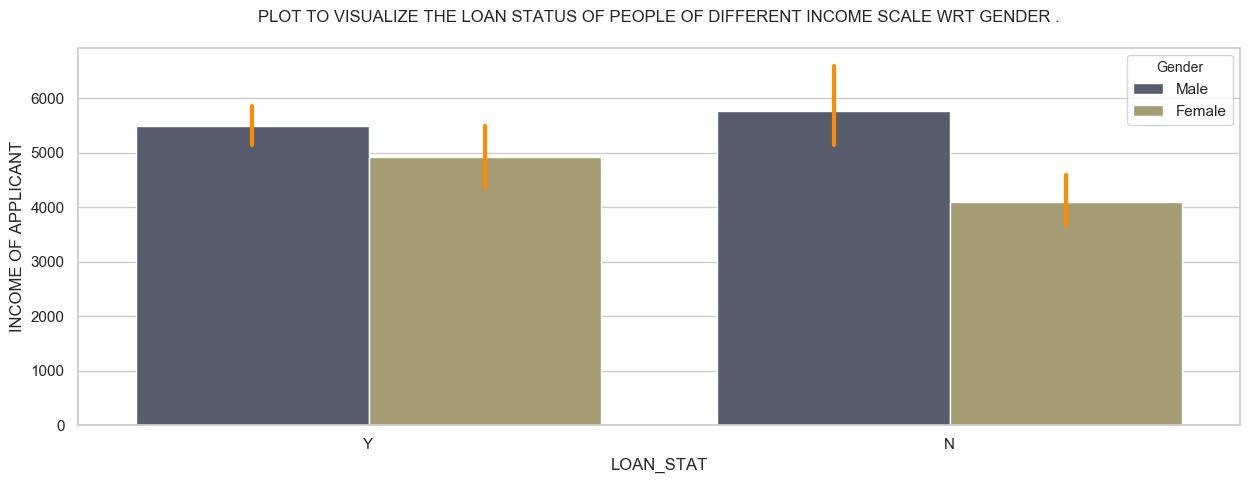

In [35]:
plt.figure(figsize=(15,5),dpi=100)
sns.set_context('talk',font_scale=0.9)
sns.set(style='whitegrid')
sns.barplot(x='Loan_Status',y='ApplicantIncome',hue='Gender',data=ln,ci=75,orient='v',palette='cividis',saturation=25,errcolor='darkorange',errwidth=3)
plt.xlabel('LOAN_STAT')
plt.ylabel('INCOME OF APPLICANT')
plt.title('PLOT TO VISUALIZE THE LOAN STATUS OF PEOPLE OF DIFFERENT INCOME SCALE WRT GENDER .\n')
plt.show()

        MALES DO EARN HIGHER AS COMPARED TO FEMALE AND THE ALLOCATION ON LOAN IS ALSO HIGH IN CASE OF MALES

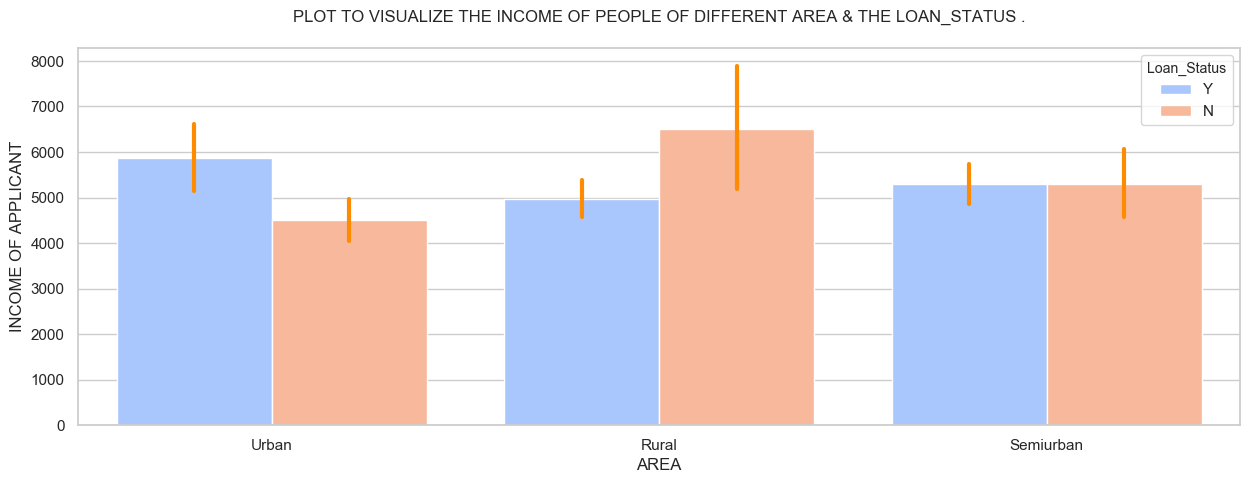

In [36]:
plt.figure(figsize=(15,5),dpi=100)
sns.set_context('talk',font_scale=0.9)
sns.set(style='whitegrid')
sns.barplot(x='Property_Area',y='ApplicantIncome',hue='Loan_Status',data=ln,ci=75,orient='v',palette='coolwarm',saturation=25,errcolor='darkorange',errwidth=3)
plt.xlabel('AREA')
plt.ylabel('INCOME OF APPLICANT')
plt.title('PLOT TO VISUALIZE THE INCOME OF PEOPLE OF DIFFERENT AREA & THE LOAN_STATUS .\n')
plt.show()

                  THE PEOPLE OF URBAN AREAS EARNS HIGH AND LOAN ALLOCATION IS ALSO HIGH AT THAT AREA

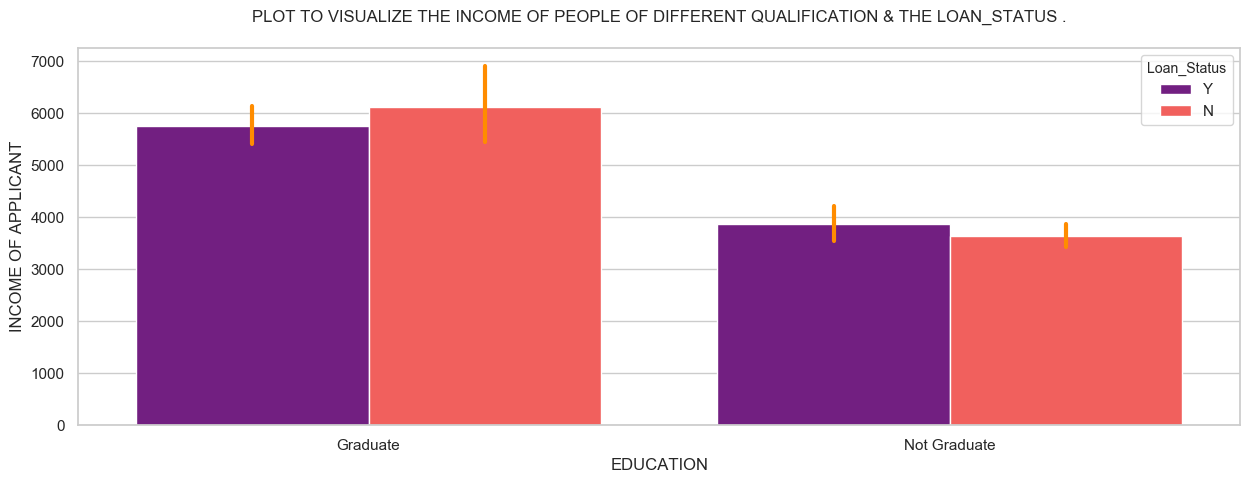

In [37]:
plt.figure(figsize=(15,5),dpi=100)
sns.set_context('talk',font_scale=0.9)
sns.set(style='whitegrid')
sns.barplot(x='Education',y='ApplicantIncome',hue='Loan_Status',data=ln,ci=75,orient='v',palette='magma',saturation=25,errcolor='darkorange',errwidth=3)
plt.xlabel('EDUCATION')
plt.ylabel('INCOME OF APPLICANT')
plt.title('PLOT TO VISUALIZE THE INCOME OF PEOPLE OF DIFFERENT QUALIFICATION & THE LOAN_STATUS .\n')
plt.show()

                                        LOAN GIVEN IS HIGH IN CASE OF GRADUATE

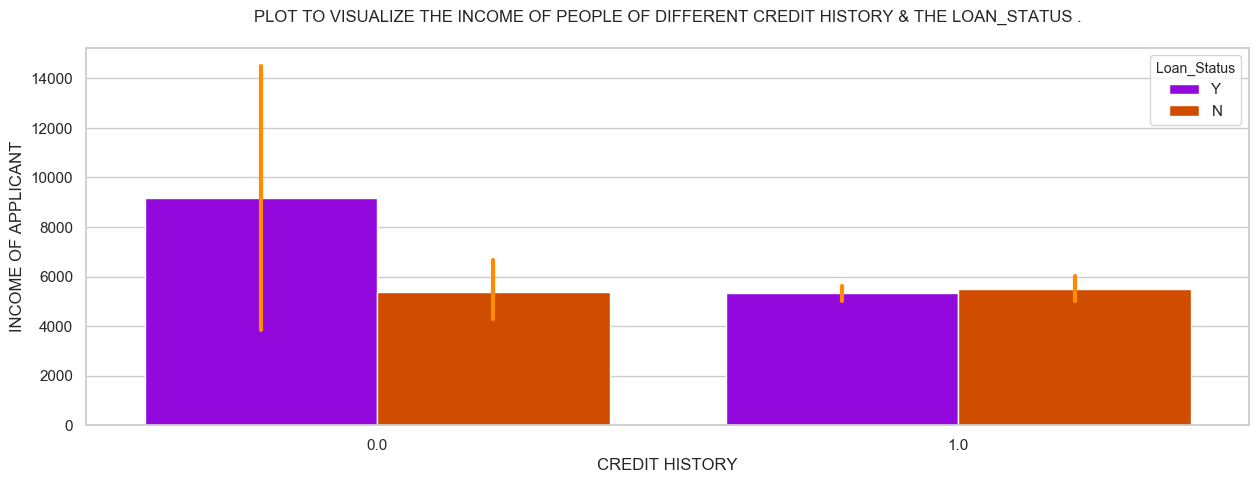

In [38]:
plt.figure(figsize=(15,5),dpi=100)
sns.set_context('talk',font_scale=0.9)
sns.set(style='whitegrid')
sns.barplot(x='Credit_History',y='ApplicantIncome',hue='Loan_Status',data=ln,ci=75,orient='v',palette='gnuplot',saturation=25,errcolor='darkorange',errwidth=3)
plt.xlabel('CREDIT HISTORY')
plt.ylabel('INCOME OF APPLICANT')
plt.title('PLOT TO VISUALIZE THE INCOME OF PEOPLE OF DIFFERENT CREDIT HISTORY & THE LOAN_STATUS .\n')
plt.show()

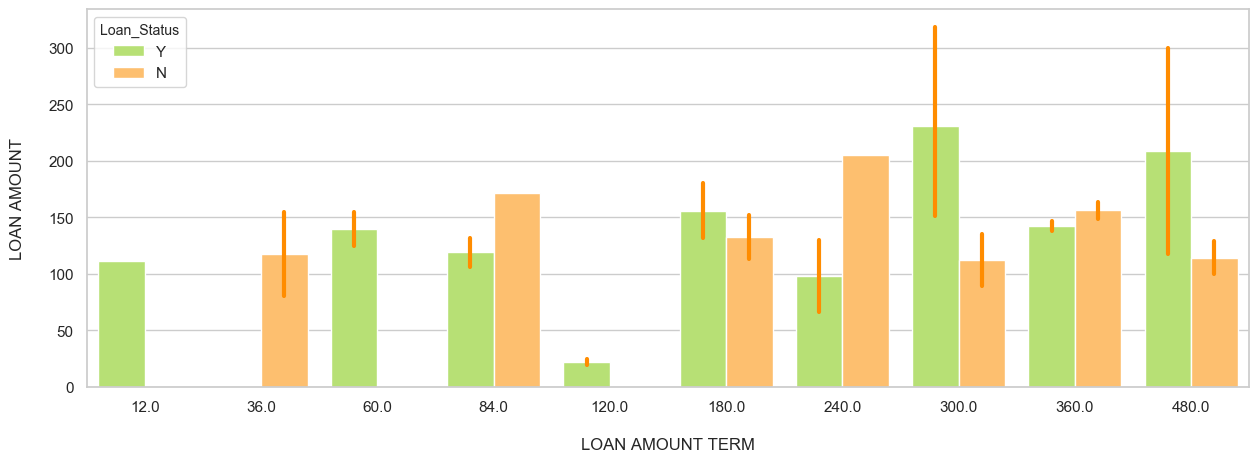

In [39]:
plt.figure(figsize=(15,5),dpi=100)
sns.set_context('talk',font_scale=0.9)
sns.set(style='whitegrid')
sns.barplot(x='Loan_Amount_Term',y='LoanAmount',hue='Loan_Status',data=ln,ci=75,orient='v',palette='RdYlGn_r',saturation=25,errcolor='darkorange',errwidth=3)
plt.xlabel('\nLOAN AMOUNT TERM')
plt.ylabel('LOAN AMOUNT\n')
plt.show()

                                    LOAN AMOUNT OF 200 FOR A DURATION OF 300 MONTH IS HIGH

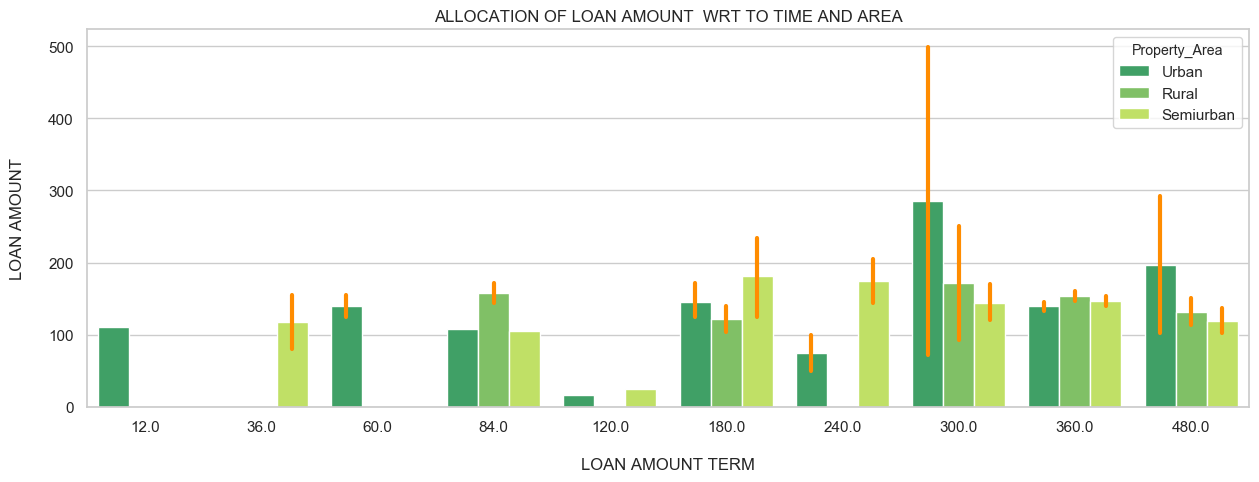

In [40]:
plt.figure(figsize=(15,5),dpi=100)
sns.set_context('talk',font_scale=0.9)
sns.set(style='whitegrid')
sns.barplot(x='Loan_Amount_Term',y='LoanAmount',hue='Property_Area',data=ln,ci=75,orient='v',palette='summer',saturation=25,errcolor='darkorange',errwidth=3)
plt.xlabel('\nLOAN AMOUNT TERM')
plt.ylabel('LOAN AMOUNT\n')
plt.title('ALLOCATION OF LOAN AMOUNT  WRT TO TIME AND AREA')
plt.show()

                            IN URBAN AREAS APPROXIMATELY LOAN WITH DURATION OF 300 MONTH IS GIVEN

In [41]:
#mapping the categorical values by allocating numerical values
m1={'Yes':1,'No':0}
ln['Self_Employed']=ln['Self_Employed'].map(m1)
ln['Married']=ln['Married'].map(m1)


m2={'Male':1,'Female':0}
ln['Gender']=ln['Gender'].map(m2)


m3={'Graduate':1,'Not Graduate':0}
ln['Education']=ln['Education'].map(m3)


m4={'Rural':1,'Semiurban':2,'Urban':3}
ln['Property_Area']=ln['Property_Area'].map(m4)


m5={'0':0,'1':1,'2':2,'3+':2}
ln['Dependents']=ln['Dependents'].map(m5)


m6={'Y':1,'N':0}
ln['Loan_Status']=ln['Loan_Status'].map(m6)


In [42]:
ln.tail(12)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
602,1,1,2,1,0,5703,0.0,128.000000,360.0,1.0,3,1
603,1,0,0,1,0,3676,4301.0,172.000000,360.0,1.0,1,1
604,0,1,1,1,0,12000,0.0,496.000000,360.0,1.0,2,1
605,1,1,0,0,0,2400,3800.0,151.220994,180.0,1.0,3,0
606,1,1,1,1,0,3400,2500.0,173.000000,360.0,1.0,2,1
607,1,1,2,0,0,3987,1411.0,157.000000,360.0,1.0,1,1
608,1,1,0,1,0,3232,1950.0,108.000000,360.0,1.0,1,1
609,0,0,0,1,0,2900,0.0,71.000000,360.0,1.0,1,1
610,1,1,2,1,0,4106,0.0,40.000000,180.0,1.0,1,1
611,1,1,1,1,0,8072,240.0,253.000000,360.0,1.0,3,1


In [43]:
#boxplot and zscore to visualize and remove outliers
cl=ln.columns.values
cl

array(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status'], dtype=object)

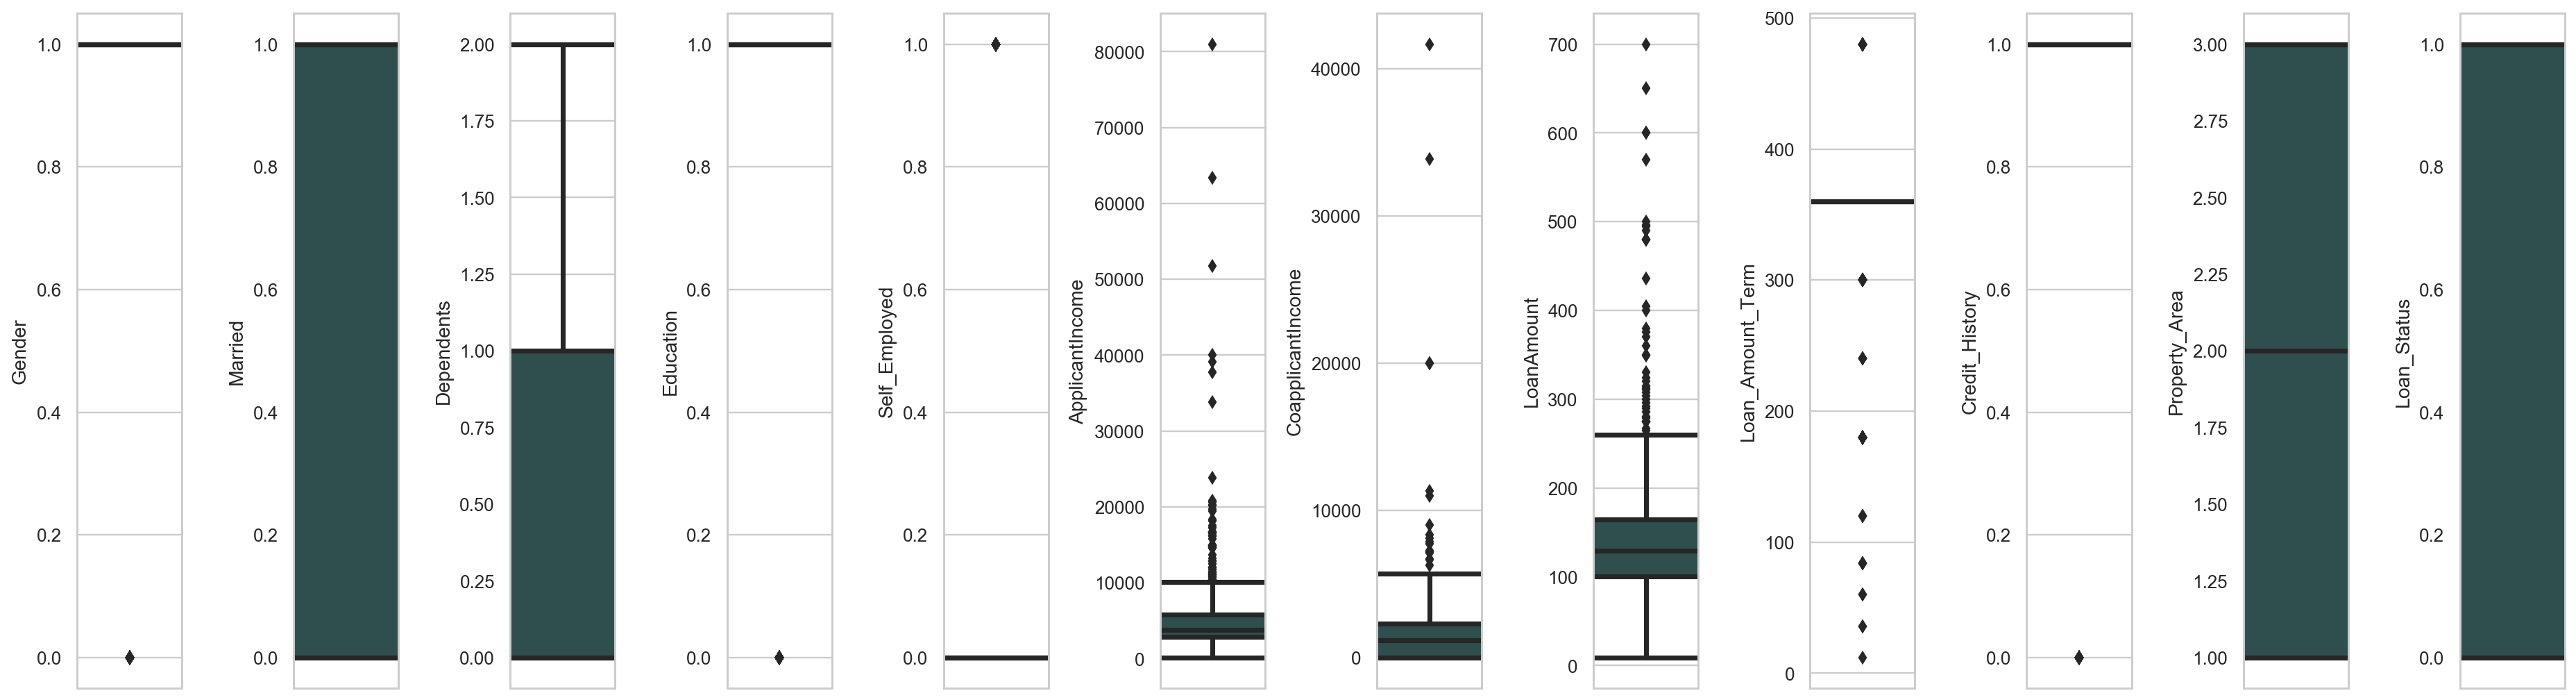

In [44]:
plt.figure(figsize=(22,12),dpi=170)
sns.set_context('talk',font_scale=1.4)
sns.set(style='whitegrid')
for i in range (0,len(cl)):
    plt.subplot(2,12,i+1)
    sns.boxplot(ln[cl[i]],orient='v',color='darkslategrey',saturation=15,width=2,linewidth=3)
plt.tight_layout()

In [45]:
z=np.abs(zscore(ln))
z

array([[0.47234264, 1.37208932, 0.77975483, ..., 0.41173269, 1.22329839,
        0.67451931],
       [0.47234264, 0.72881553, 0.3994803 , ..., 0.41173269, 1.31851281,
        1.48253724],
       [0.47234264, 0.72881553, 0.77975483, ..., 0.41173269, 1.22329839,
        0.67451931],
       ...,
       [0.47234264, 0.72881553, 0.3994803 , ..., 0.41173269, 1.22329839,
        0.67451931],
       [0.47234264, 0.72881553, 1.57871543, ..., 0.41173269, 1.22329839,
        0.67451931],
       [2.11710719, 1.37208932, 0.77975483, ..., 2.42876026, 0.04760721,
        1.48253724]])

In [46]:
print(np.where(z>3))

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
       183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
       432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
       600, 604], dtype=int64), array([6, 8, 8, 8, 5, 7, 8, 5, 7, 5, 7, 6, 7, 5, 5, 8, 8, 7, 7, 8, 5, 7,
       7, 6, 5, 6, 7, 5, 7, 8, 8, 7, 7, 7, 8, 7, 8, 6, 8, 6, 7],
      dtype=int64))


In [47]:
#checking some outliers
print(z[9][6],'\n',z[185][5],'\n',z[561][7],'\n',z[506][7])

3.196712546212882 
 5.52804426389617 
 5.401085689659898 
 3.9720368370065433


In [48]:
loan=ln[(z<3).all(axis=1)]

In [49]:
print('The shape before outlier removal:\t',ln.shape,'\nThe shape after outlier removal:\t',loan.shape,
      '\nSo a total of',len(ln)-len(loan),'rows has been removed')

The shape before outlier removal:	 (614, 12) 
The shape after outlier removal:	 (577, 12) 
So a total of 37 rows has been removed


In [50]:
loan.head(7)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,1,0,5849,0.0,144.294404,360.0,1.0,3,1
1,1,1,1,1,0,4583,1508.0,128.000000,360.0,1.0,1,0
2,1,1,0,1,1,3000,0.0,66.000000,360.0,1.0,3,1
3,1,1,0,0,0,2583,2358.0,120.000000,360.0,1.0,3,1
4,1,0,0,1,0,6000,0.0,141.000000,360.0,1.0,3,1
5,1,1,2,1,1,5417,4196.0,267.000000,360.0,1.0,3,1
6,1,1,0,0,0,2333,1516.0,95.000000,360.0,1.0,3,1


In [51]:
cl=loan.columns.values
cl

array(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area',
       'Loan_Status'], dtype=object)

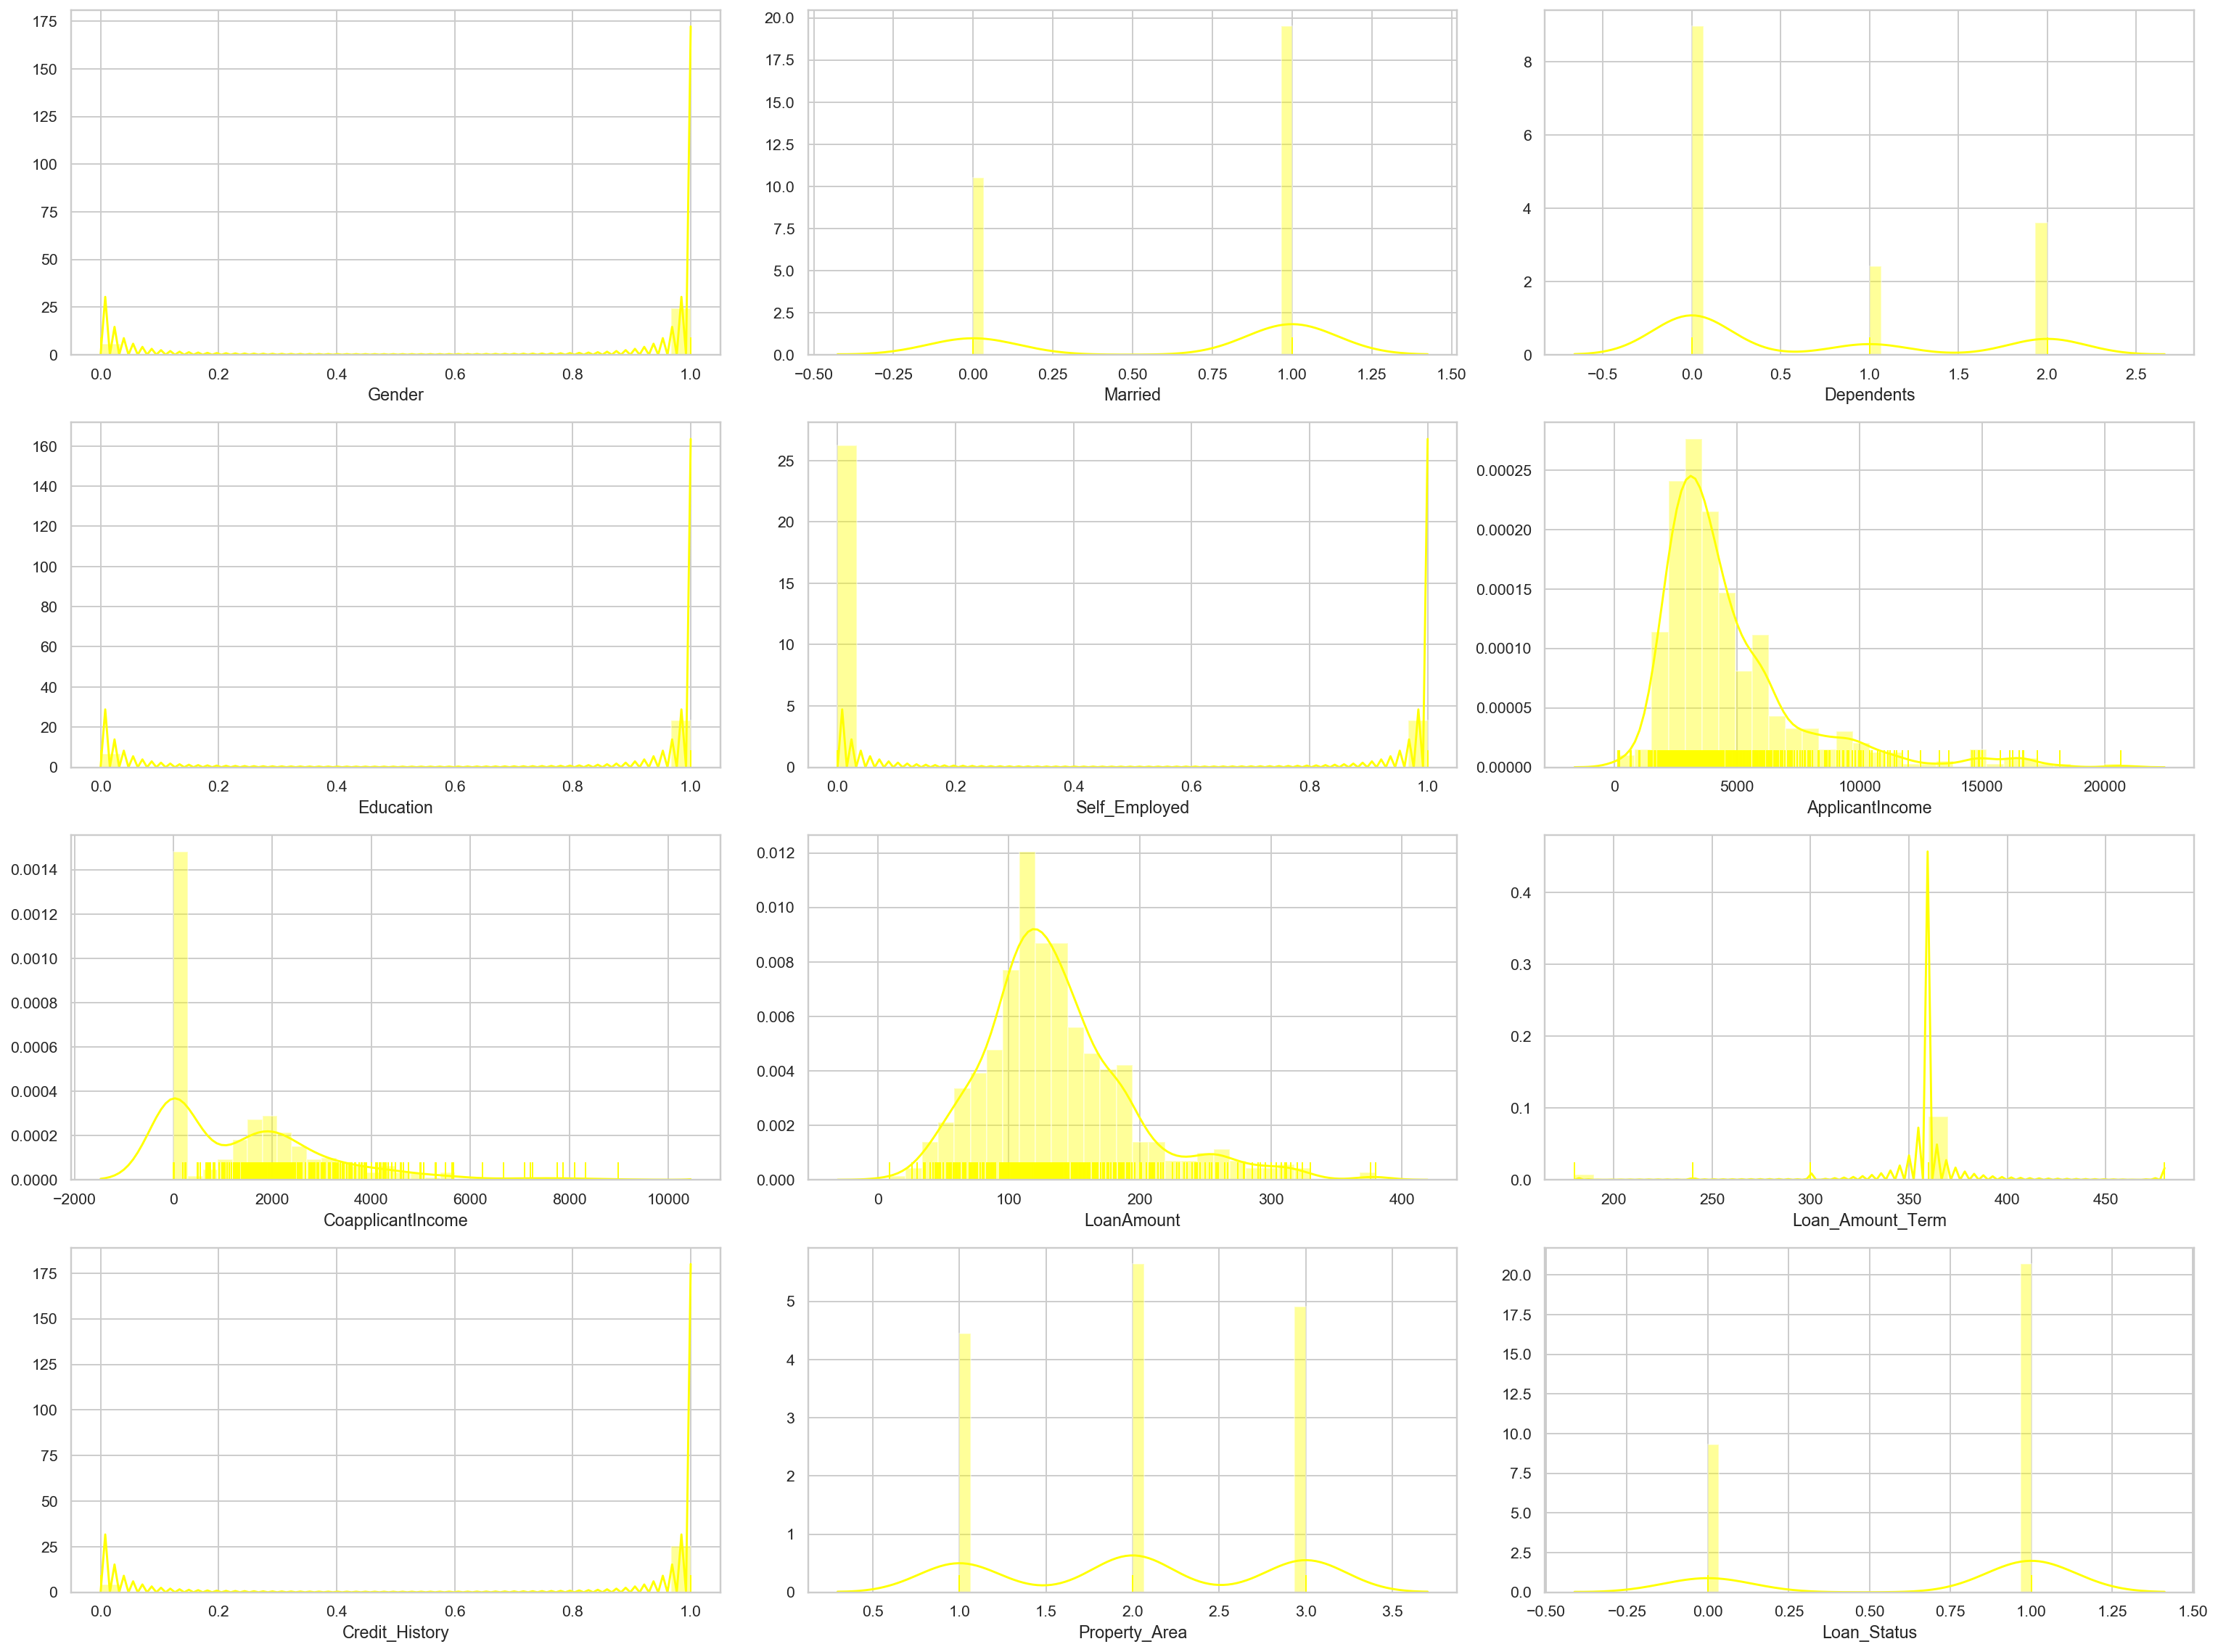

In [52]:
#using distplot to view distribution of all attributes
plt.figure(figsize=(22,20),dpi=140)
sns.set_context('talk',font_scale=1.4)
sns.set(style='whitegrid')
for i in range (0,len(cl)):
    plt.subplot(5,3,i+1)
    sns.distplot(loan[cl[i]],color='yellow',kde=True,rug=True,hist=True,bins=30)
plt.tight_layout()

In [53]:
loan.skew()

Gender              -1.622920
Married             -0.630211
Dependents           0.752645
Education           -1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.109741
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

In [54]:
for i in loan.columns:
    if loan.skew().loc[i]>0.55:
        loan[i]=np.log1p(loan[i])
print(loan.skew())
if loan.skew().loc[i]<0.55:
    print('\n\n There is no skew')

Gender              -1.622920
Married             -0.630211
Dependents           0.595121
Education           -1.306588
Self_Employed        2.252848
ApplicantIncome     -0.204913
CoapplicantIncome   -0.216757
LoanAmount          -0.699038
Loan_Amount_Term    -2.098806
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64


 There is no skew


In [55]:
loan_corr=loan.corr()
loan_corr

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Gender,1.000000,0.378997,0.187264,-0.045696,-0.006207,0.060302,0.235133,0.178001,-0.104983,0.013172,-0.026340,0.017408
Married,0.378997,1.000000,0.351855,-0.024817,-0.015779,-0.026283,0.339399,0.186144,-0.127348,0.019308,0.010595,0.089026
Dependents,0.187264,0.351855,1.000000,-0.060827,0.059908,0.104717,0.028194,0.130432,-0.092422,-0.015389,0.032701,0.023915
Education,-0.045696,-0.024817,-0.060827,1.000000,0.007139,0.174609,-0.054682,0.109312,0.090523,0.075217,0.068596,0.092658
Self_Employed,-0.006207,-0.015779,0.059908,0.007139,1.000000,0.207418,-0.089466,0.112984,-0.032914,-0.016390,-0.028253,-0.026525
ApplicantIncome,0.060302,-0.026283,0.104717,0.174609,0.207418,1.000000,-0.362495,0.405271,-0.070193,0.027449,-0.010603,-0.001761
CoapplicantIncome,0.235133,0.339399,0.028194,-0.054682,-0.089466,-0.362495,1.000000,0.196050,0.004463,0.008071,-0.072402,0.081455
LoanAmount,0.178001,0.186144,0.130432,0.109312,0.112984,0.405271,0.196050,1.000000,0.049599,-0.013973,-0.102630,-0.026124
Loan_Amount_Term,-0.104983,-0.127348,-0.092422,0.090523,-0.032914,-0.070193,0.004463,0.049599,1.000000,0.027392,-0.057004,-0.020291
Credit_History,0.013172,0.019308,-0.015389,0.075217,-0.016390,0.027449,0.008071,-0.013973,0.027392,1.000000,-0.008121,0.560936


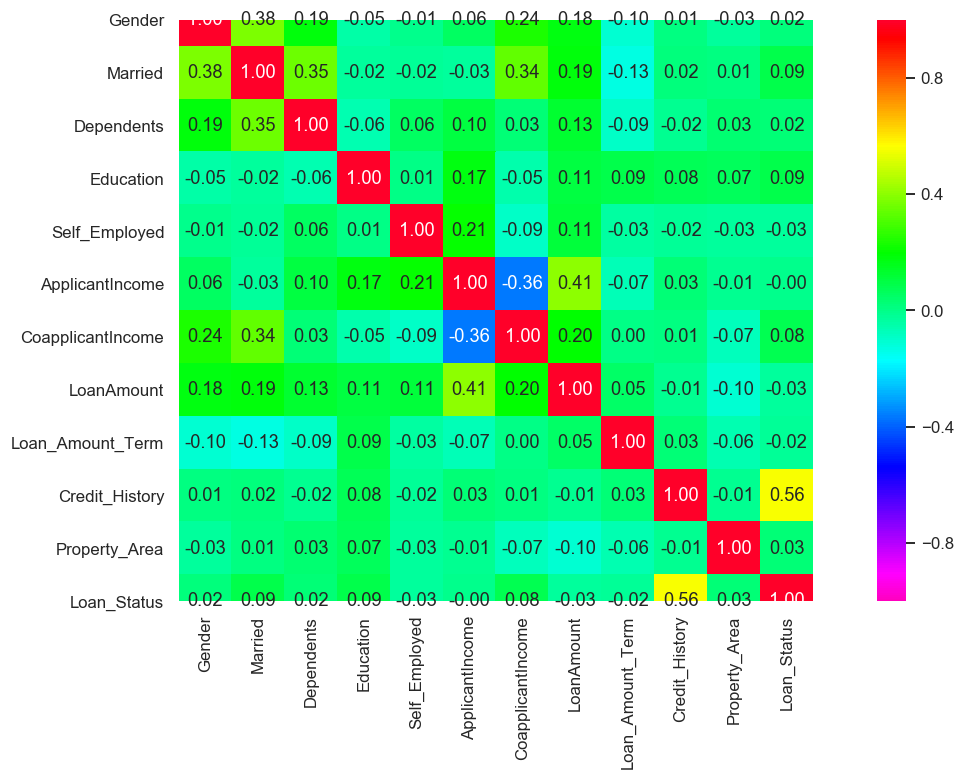

In [56]:
plt.figure(figsize=(15,7),dpi=110)
sns.set_context('talk',font_scale=1.4)
sns.set(style='whitegrid')
sns.heatmap(loan_corr,annot=True,fmt='.2f',cmap='gist_rainbow_r',square=True,vmax=1,vmin=-1)
plt.show()

In [57]:
from sklearn.preprocessing import StandardScaler #FOR STANDARD SCALING OF INPUTS
from sklearn.model_selection import train_test_split,cross_val_score as cvs ,RandomizedSearchCV as rsv
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report,f1_score

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import roc_curve,roc_auc_score,auc

from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier,AdaBoostClassifier

import joblib
import warnings
warnings.filterwarnings('ignore')

In [58]:
loan.head(7)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0.000000,1,0.000000,8.674197,0.000000,4.978762,360.0,1.0,3,1
1,1,1,0.693147,1,0.000000,8.430327,7.319202,4.859812,360.0,1.0,1,0
2,1,1,0.000000,1,0.693147,8.006701,0.000000,4.204693,360.0,1.0,3,1
3,1,1,0.000000,0,0.000000,7.857094,7.765993,4.795791,360.0,1.0,3,1
4,1,0,0.000000,1,0.000000,8.699681,0.000000,4.955827,360.0,1.0,3,1
5,1,1,1.098612,1,0.693147,8.597482,8.342125,5.590987,360.0,1.0,3,1
6,1,1,0.000000,0,0.000000,7.755339,7.324490,4.564348,360.0,1.0,3,1


In [59]:
#splitting the dataset into X and Y for training and testing
x=loan.drop(['Loan_Status'],axis=1)
y=loan['Loan_Status']
print('x:',"--"*30,"\n", x,'\nshape of x:', x.shape)
print('\ny:',"--"*30,"\n", y,'\nshape of y:', y.shape)

x: ------------------------------------------------------------ 
      Gender  Married  Dependents  Education  Self_Employed  ApplicantIncome  \
0         1        0    0.000000          1       0.000000         8.674197   
1         1        1    0.693147          1       0.000000         8.430327   
2         1        1    0.000000          1       0.693147         8.006701   
3         1        1    0.000000          0       0.000000         7.857094   
4         1        0    0.000000          1       0.000000         8.699681   
..      ...      ...         ...        ...            ...              ...   
609       0        0    0.000000          1       0.000000         7.972811   
610       1        1    1.098612          1       0.000000         8.320448   
611       1        1    0.693147          1       0.000000         8.996280   
612       1        1    1.098612          1       0.000000         8.933796   
613       0        0    0.000000          1       0.693147       

In [60]:
#Using StandardScaler Feature to standardise the values of x
ss=StandardScaler()
x=ss.fit_transform(x)
print(x)

[[ 0.47713685 -1.36251079 -0.79078195 ...  0.23085296  0.41851254
   1.22747207]
 [ 0.47713685  0.73393914  0.66554403 ...  0.23085296  0.41851254
  -1.30652215]
 [ 0.47713685  0.73393914 -0.79078195 ...  0.23085296  0.41851254
   1.22747207]
 ...
 [ 0.47713685  0.73393914  0.66554403 ...  0.23085296  0.41851254
   1.22747207]
 [ 0.47713685  0.73393914  1.51744012 ...  0.23085296  0.41851254
   1.22747207]
 [-2.09583477 -1.36251079 -0.79078195 ...  0.23085296 -2.38941464
  -0.03952504]]


In [61]:
#converting y into  np.array format form pandas.core.series.Series form and reshaping it in the form of 1 columns and many rows
y=np.array(y)
y=y.reshape(-1,1)
print(y.shape)

(577, 1)


In [62]:
print('shape of x=', x.shape,'\nshape of y=', y.shape)

shape of x= (577, 11) 
shape of y= (577, 1)


creating a function to achive the highest perfoming random st,accuracy score,tpr,fpr,auc score for all model to be used

In [63]:
def acusr(model,x,y):
    max_ac_score=0
    for rst in range(25,180):
        x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.35,random_state=rst)
        model.fit(x_train,y_train)
        pred=model.predict(x_test)
        ascr=accuracy_score(pred,y_test)
        f1=f1_score(pred,y_test)
        clr=classification_report(y_test,pred)
        conf=confusion_matrix(y_test,pred)
        auc_scores=roc_auc_score(y_test,pred)
        tpr,fpr,threshold=roc_curve(y_test,pred)
        if ascr>max_ac_score:
            max_ac_score=ascr
            final_rst=rst
    print("In this",model,'\n\nThe best suited random_score is: ', final_rst, '\n\nAccuracy score:', max_ac_score)
    print('\nF1 SCORE:', f1)
    print('\nCONFUSION MATRIX:\n',conf)
    print('\nAUC_ROC Score:\n',auc_scores)
    print('\nTPR:',tpr,'\nFPR:',fpr)
    

LOGISTIC REGRESSION

In [64]:
logi=LogisticRegression()
acusr(logi,x,y)

In this LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False) 

The best suited random_score is:  68 

Accuracy score: 0.8762376237623762

F1 SCORE: 0.8859934853420195

CONFUSION MATRIX:
 [[ 31  33]
 [  2 136]]

AUC_ROC Score:
 0.7349411231884058

TPR: [0.       0.515625 1.      ] 
FPR: [0.         0.98550725 1.        ]


In [65]:
#using cross_val_score to check for over/under fitting of logistic regressor model
logi_accuracy=cvs(logi,x,y,scoring='accuracy',cv=50)
logi_roc_auc=cvs(logi,x,y,scoring='roc_auc',cv=50)
print('THE ACCURACY SCORE AT LOGISTIC MODEL IS=', logi_accuracy.mean())
print('THE AUC_ROC SCORE AT LOGISTIC MODEL IS=', logi_roc_auc.mean())

THE ACCURACY SCORE AT LOGISTIC MODEL IS= 0.8197575757575756
THE AUC_ROC SCORE AT LOGISTIC MODEL IS= 0.7478571428571429


DECISION TREE CLASSIFIER

In [66]:
#using RandomizedSearchCV to get best parameters for optimum performance of DTC model

dtc=DecisionTreeClassifier()
dtc_para={'criterion':['gini','entropy'],'splitter':['best','random'],'max_depth': range(4,10),'min_samples_split':range(2,8)}
dtc_rs=rsv(dtc,dtc_para,cv=70)
dtc_rs.fit(x,y)
print(dtc_rs,'\n')
print(dtc_rs.best_score_,'\n')
print(dtc_rs.best_params_)

RandomizedSearchCV(cv=70, error_score='raise-deprecating',
                   estimator=DecisionTreeClassifier(class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features=None,
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    presort=False,
                                                    random_state=None,
                                                    splitter='best'

In [67]:
dtc=DecisionTreeClassifier(splitter='random',min_samples_split=6,max_depth=6,criterion='gini')
acusr(dtc,x,y)

In this DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=6,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=6,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='random') 

The best suited random_score is:  68 

Accuracy score: 0.8712871287128713

F1 SCORE: 0.8309859154929579

CONFUSION MATRIX:
 [[ 36  28]
 [ 20 118]]

AUC_ROC Score:
 0.708786231884058

TPR: [0.     0.4375 1.    ] 
FPR: [0.         0.85507246 1.        ]


In [68]:
#using cross_val_score to check for over/under fitting of DTC model
dtc_accuracy=cvs(dtc,x,y,scoring='accuracy',cv=50)
dtc_roc_auc=cvs(dtc,x,y,scoring='roc_auc',cv=50)
print('THE ACCURACY SCORE AT DTC MODEL IS=', dtc_accuracy.mean())
print('THE AUC_ROC SCORE AT DTC MODEL IS=',  dtc_roc_auc.mean())

THE ACCURACY SCORE AT DTC MODEL IS= 0.7935454545454544
THE AUC_ROC SCORE AT DTC MODEL IS= 0.7606845238095239


SUPPORT VECTOR CLASSIFIER

In [69]:
svc=SVC()
svc_para={'kernel':['rbf','poly','linear'],'gamma':[0.01,0.1]}
svc_rsv=rsv(svc,svc_para,cv=70)
svc_rsv.fit(x,y)
print(svc_rsv)
print('\nbest score=', svc_rsv.best_score_)
print("\nbest parameters for SVC=\n",svc_rsv.best_params_)

RandomizedSearchCV(cv=70, error_score='raise-deprecating',
                   estimator=SVC(C=1.0, cache_size=200, class_weight=None,
                                 coef0=0.0, decision_function_shape='ovr',
                                 degree=3, gamma='auto_deprecated',
                                 kernel='rbf', max_iter=-1, probability=False,
                                 random_state=None, shrinking=True, tol=0.001,
                                 verbose=False),
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'gamma': [0.01, 0.1],
                                        'kernel': ['rbf', 'poly', 'linear']},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

best score= 0.8214904679376083

best parameters for SVC=
 {'kernel': 'rbf', 'gamma': 0.1}


In [70]:
svc=SVC(kernel='rbf',gamma=0.1,degree=5)
acusr(svc,x,y)

In this SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=5, gamma=0.1, kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False) 

The best suited random_score is:  39 

Accuracy score: 0.8712871287128713

F1 SCORE: 0.8859934853420195

CONFUSION MATRIX:
 [[ 31  33]
 [  2 136]]

AUC_ROC Score:
 0.7349411231884058

TPR: [0.       0.515625 1.      ] 
FPR: [0.         0.98550725 1.        ]


In [71]:
#using cross_val_score to check for over/under fitting of SVC model
svc_accuracy=cvs(svc,x,y,scoring='accuracy',cv=50)
svc_roc_auc=cvs(svc,x,y,scoring='roc_auc',cv=50)
print('THE ACCURACY SCORE AT SVC MODEL IS=', svc_accuracy.mean())
print('THE AUC_ROC SCORE AT SVC MODEL IS=',  svc_roc_auc.mean())

THE ACCURACY SCORE AT SVC MODEL IS= 0.8197575757575757
THE AUC_ROC SCORE AT SVC MODEL IS= 0.7605357142857142


K NEIGHBORS CLASSIFIER

In [72]:
#using KNeighborsClassifier algo with RandomizedSearchCV to get best parameters for optimum performance
knc=KNeighborsClassifier()
knc_para={'n_neighbors':range(20,65),'algorithm':['ball_tree','kd_tree','brute']}
knc_rsv=rsv(knc,knc_para,cv=30)
knc_rsv.fit(x,y)
print(knc_rsv)
print('\nbest score=',knc_rsv.best_score_)
print('\nbest parameters for KNC=\n',knc_rsv.best_params_)

RandomizedSearchCV(cv=30, error_score='raise-deprecating',
                   estimator=KNeighborsClassifier(algorithm='auto',
                                                  leaf_size=30,
                                                  metric='minkowski',
                                                  metric_params=None,
                                                  n_jobs=None, n_neighbors=5,
                                                  p=2, weights='uniform'),
                   iid='warn', n_iter=10, n_jobs=None,
                   param_distributions={'algorithm': ['ball_tree', 'kd_tree',
                                                      'brute'],
                                        'n_neighbors': range(20, 65)},
                   pre_dispatch='2*n_jobs', random_state=None, refit=True,
                   return_train_score=False, scoring=None, verbose=0)

best score= 0.804159445407279

best parameters for KNC=
 {'n_neighbors': 28, 'algorithm': 'ball_tree'}

In [73]:
knc=KNeighborsClassifier(n_neighbors=28,algorithm='ball_tree')
acusr(knc,x,y)

In this KNeighborsClassifier(algorithm='ball_tree', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=28, p=2,
                     weights='uniform') 

The best suited random_score is:  150 

Accuracy score: 0.8564356435643564

F1 SCORE: 0.8698412698412699

CONFUSION MATRIX:
 [[ 24  40]
 [  1 137]]

AUC_ROC Score:
 0.6838768115942029

TPR: [0.    0.625 1.   ] 
FPR: [0.         0.99275362 1.        ]


In [74]:
#using cross_val_score to check for over/under fitting of KNC model
knc_accuracy=cvs(knc,x,y,scoring='accuracy',cv=50)
knc_roc_auc=cvs(knc,x,y,scoring='roc_auc',cv=50)
print('THE ACCURACY SCORE AT KNC MODEL IS=', knc_accuracy.mean())
print('THE AUC_ROC SCORE AT KNC MODEL IS=',  knc_roc_auc.mean())

THE ACCURACY SCORE AT KNC MODEL IS= 0.8058181818181818
THE AUC_ROC SCORE AT KNC MODEL IS= 0.7391964285714286


GAUSSIAN NB

In [75]:
gnb=GaussianNB()
acusr(gnb,x,y)

In this GaussianNB(priors=None, var_smoothing=1e-09) 

The best suited random_score is:  91 

Accuracy score: 0.8762376237623762

F1 SCORE: 0.8859934853420195

CONFUSION MATRIX:
 [[ 31  33]
 [  2 136]]

AUC_ROC Score:
 0.7349411231884058

TPR: [0.       0.515625 1.      ] 
FPR: [0.         0.98550725 1.        ]


In [76]:
#using cross_val_score to check for over/under fitting of KNC model
gnb_accuracy=cvs(gnb,x,y,scoring='accuracy',cv=50)
gnb_roc_auc=cvs(gnb,x,y,scoring='roc_auc',cv=50)
print('THE ACCURACY SCORE AT GNB MODEL IS=', gnb_accuracy.mean())
print('THE AUC_ROC SCORE AT GNB MODEL IS=',  gnb_roc_auc.mean())

THE ACCURACY SCORE AT GNB MODEL IS= 0.8161212121212119
THE AUC_ROC SCORE AT GNB MODEL IS= 0.7552083333333333


RANDOM FOREST CLASSIFIER

In [77]:
rfc=RandomForestClassifier()
rfc_para={"n_estimators":[200,300,350],'max_depth':[6,9],'criterion':('gini','entropy')}
rfc_rsv=rsv(rfc,rfc_para,cv=70)
rfc_rsv.fit(x,y)
print(rfc_rsv)
print('\nbest score=',rfc_rsv.best_score_)
print('\nbest parameters for RFC=\n',rfc_rsv.best_params_)

RandomizedSearchCV(cv=70, error_score='raise-deprecating',
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
                                                    n_estimators='warn',
                                                    n_jobs=Non

In [78]:
rfc=RandomForestClassifier(n_estimators=300,max_depth=6,criterion='entropy')
acusr(rfc,x,y)

In this RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
                       max_depth=6, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=300,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False) 

The best suited random_score is:  91 

Accuracy score: 0.8762376237623762

F1 SCORE: 0.8704318936877077

CONFUSION MATRIX:
 [[ 32  32]
 [  7 131]]

AUC_ROC Score:
 0.7246376811594203

TPR: [0.  0.5 1. ] 
FPR: [0.         0.94927536 1.        ]


In [79]:
rfc_accuracy=cvs(rfc,x,y,scoring='accuracy',cv=50)
rfc_roc_auc=cvs(rfc,x,y,scoring='roc_auc',cv=50)
print('THE ACCURACY SCORE AT RFC MODEL IS=', rfc_accuracy.mean())
print('THE AUC_ROC SCORE AT RFC MODEL IS=',  rfc_roc_auc.mean())

THE ACCURACY SCORE AT RFC MODEL IS= 0.8197575757575756
THE AUC_ROC SCORE AT RFC MODEL IS= 0.7819940476190476


GRADIENT BOOSTING CLASSIFIER

In [80]:
gbc=GradientBoostingClassifier()
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=85)
para= {"learning_rate": [0.001,0.025],"n_estimators":[450,600]}
gbc_rs= rsv(gbc,para,cv=70)
gbc_rs.fit(x_train,y_train)
print(gbc_rs)
print("\nbest parameters:",gbc_rs.best_params_)
print("\n best score:",gbc_rs.best_score_)

RandomizedSearchCV(cv=70, error_score='raise-deprecating',
                   estimator=GradientBoostingClassifier(criterion='friedman_mse',
                                                        init=None,
                                                        learning_rate=0.1,
                                                        loss='deviance',
                                                        max_depth=3,
                                                        max_features=None,
                                                        max_leaf_nodes=None,
                                                        min_impurity_decrease=0.0,
                                                        min_impurity_split=None,
                                                        min_samples_leaf=1,
                                                        min_samples_split=2,
                                                        min_weight_fraction_leaf=0.0,
                    

In [81]:
gbc=GradientBoostingClassifier(learning_rate=0.001,max_depth=4,n_estimators=600)
acusr(gbc,x,y)

In this GradientBoostingClassifier(criterion='friedman_mse', init=None,
                           learning_rate=0.001, loss='deviance', max_depth=4,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=1, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=600,
                           n_iter_no_change=None, presort='auto',
                           random_state=None, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False) 

The best suited random_score is:  68 

Accuracy score: 0.8663366336633663

F1 SCORE: 0.8618421052631579

CONFUSION MATRIX:
 [[ 29  35]
 [  7 131]]

AUC_ROC Score:
 0.7012001811594203

TPR: [0.       0.546875 1.      ] 
FPR: [0.         0.94927536 1.        ]


In [82]:
gbc_accuracy=cvs(gbc,x,y,scoring='accuracy',cv=50)
gbc_roc_auc=cvs(gbc,x,y,scoring='roc_auc',cv=50)
print('THE ACCURACY SCORE AT GBC MODEL IS=', gbc_accuracy.mean())
print('THE AUC_ROC SCORE AT GBC MODEL IS=',  gbc_roc_auc.mean())

THE ACCURACY SCORE AT GBC MODEL IS= 0.8076060606060605
THE AUC_ROC SCORE AT GBC MODEL IS= 0.7938541666666667


In [ ]:
WE GOT ALL THE RANDOM STATE,ACCURACY_SCORE,AUC_ROC SCORE OF ALL ALGORITHMS WITH AND WITHOUT CROSSVALIDATION
NOW PUTTING THEM ALL IN ONE DATAFRAME FOR TABULAR FORM PROPER VISUALIZATION

In [85]:
results=[['LOGI_REG',68,0.8762376,0.7349411,[0.0,0.515625,1.0],[0.0,0.98550725,1.0],0.819757,0.747857],

         ['DTC',68,0.871287,0.708786,[0.0,0.4375,1.0],[0.0,0.85507246,1.0],0.793545,0.760684],
         
         ['SVC',39,0.8712871,0.734941,[0.0,0.515625,1.0],[0.0,0.98550725,1.0],0.819757,0.760535],
         
         ['KNC',150,0.856435,0.683876,[0.0,0.625,1.0],[0.0,0.99275362,1.0],0.805818,0.739196],
         
         ['GNB',91,0.876237,0.7349411,[0.0,0.515625,1.0],[0.0,0.98550725,1.0],0.816121,0.755208],
         
         ['RFC',91,0.876237,0.724637,[0.0,0.5,1.0],[0.0,0.94927536,1.0],0.819757,0.781994],
         
         ['GBC',68, 0.866336,0.7012001,[0.0,0.546875,1.0],[0.0,0.94927536,1.0],0.807606,0.793854]] 
df=pd.DataFrame(results,columns=['MODEL','RST','ACCU W\O CV','AUC SCORE W/O CV','TPR','FPR','ACCURACY W CV','AUC SCORE W CV'])
df.style.set_properties(**{'background-color':'dimgrey','color': 'yellow','border-color': 'orange'})

,MODEL,RST,ACCU W\O CV,AUC SCORE W/O CV,TPR,FPR,ACCURACY W CV,AUC SCORE W CV
0,LOGI_REG,68,0.876238,0.734941,"[0.0, 0.515625, 1.0]","[0.0, 0.98550725, 1.0]",0.819757,0.747857
1,DTC,68,0.871287,0.708786,"[0.0, 0.4375, 1.0]","[0.0, 0.85507246, 1.0]",0.793545,0.760684
2,SVC,39,0.871287,0.734941,"[0.0, 0.515625, 1.0]","[0.0, 0.98550725, 1.0]",0.819757,0.760535
3,KNC,150,0.856435,0.683876,"[0.0, 0.625, 1.0]","[0.0, 0.99275362, 1.0]",0.805818,0.739196
4,GNB,91,0.876237,0.734941,"[0.0, 0.515625, 1.0]","[0.0, 0.98550725, 1.0]",0.816121,0.755208
5,RFC,91,0.876237,0.724637,"[0.0, 0.5, 1.0]","[0.0, 0.94927536, 1.0]",0.819757,0.781994
6,GBC,68,0.866336,0.7012,"[0.0, 0.546875, 1.0]","[0.0, 0.94927536, 1.0]",0.807606,0.793854


So basing on the above performance table we'll use AdaBoostClassifier to boost by taking SVC as base estimator 

In [86]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=85)
svc=SVC(kernel='rbf',gamma=0.01,degree=9,C=5)
para={'n_estimators':(70,80,95),'learning_rate':(0.1,0.0023,0.25)}
abc=AdaBoostClassifier(base_estimator=svc,algorithm='SAMME')
abc_rs=rsv(abc,para,cv=30)
abc_rs.fit(x_train,y_train)
print(abc_rs)
print("best parameters:", abc_rs.best_params_)
print("\n best score:",abc_rs.best_score_)


RandomizedSearchCV(cv=30, error_score='raise-deprecating',
                   estimator=AdaBoostClassifier(algorithm='SAMME',
                                                base_estimator=SVC(C=5,
                                                                   cache_size=200,
                                                                   class_weight=None,
                                                                   coef0=0.0,
                                                                   decision_function_shape='ovr',
                                                                   degree=9,
                                                                   gamma=0.01,
                                                                   kernel='rbf',
                                                                   max_iter=-1,
                                                                   probability=False,
                                                      

In [87]:
#creating the model using the abc parameters obtained from RandomizedSearchCV
abc=AdaBoostClassifier(base_estimator=svc,algorithm='SAMME',n_estimators=70,learning_rate=0.1)
acusr(abc,x,y)

In this AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=SVC(C=5, cache_size=200, class_weight=None,
                                      coef0=0.0, decision_function_shape='ovr',
                                      degree=9, gamma=0.01, kernel='rbf',
                                      max_iter=-1, probability=False,
                                      random_state=None, shrinking=True,
                                      tol=0.001, verbose=False),
                   learning_rate=0.1, n_estimators=70, random_state=None) 

The best suited random_score is:  25 

Accuracy score: 0.7623762376237624

F1 SCORE: 0.8117647058823529

CONFUSION MATRIX:
 [[  0  64]
 [  0 138]]

AUC_ROC Score:
 0.5

TPR: [0. 1.] 
FPR: [0. 1.]


Even after boosting the model is not performing well. so we will  select another model and basing on the above tabulation RFC is performaing well as compared to other model, so selcting RFC as final model

In [88]:
df.loc[df['MODEL']=='RFC']

,MODEL,RST,ACCU W\O CV,AUC SCORE W/O CV,TPR,FPR,ACCURACY W CV,AUC SCORE W CV
5,RFC,91,0.876237,0.724637,"[0.0, 0.5, 1.0]","[0.0, 0.94927536, 1.0]",0.819757,0.781994


In [90]:
#PLOTTING THE AUC CURVE USING THE PARAMETERS OBTAINED
tpr=[0.0, 0.5, 1.0]
fpr=[0.0, 0.94927536, 1.0]
AUC=0.781994

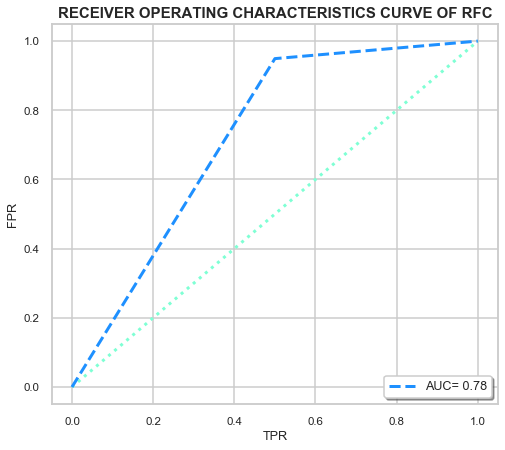

In [92]:
#plotting the auc_roc curve
sns.set(style='whitegrid')
sns.set_context('talk',font_scale=0.7)
plt.figure(figsize=(8,7))
plt.plot([0,1],[0,1],color='aquamarine',linestyle=":",lw=3)
plt.plot(tpr,fpr,label="AUC= %0.2f" % AUC,color='dodgerblue',lw=3,linestyle='--')
plt.legend(loc='lower right',fontsize='medium',shadow=True)
plt.xlabel("TPR")
plt.ylabel('FPR')
plt.title('RECEIVER OPERATING CHARACTERISTICS CURVE OF RFC',size=15,weight='bold',loc='center')
plt.show()

In [93]:
#saving RFC as final model
joblib.dump(rfc,'FRAUD_RFC.pkl')

['FRAUD_RFC.pkl']